# Assignment_10_Recommendation_System

Problem statement.

Build a recommender system by using cosine simillarties score.


In [1]:
import pandas as pd

In [4]:
book = pd.read_csv("D:\\Data Science\\Assignments DS\\LMS Assignments DS\\book.csv", encoding="ISO-8859-1")
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


# EDA

In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [5]:
book.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [6]:
book.shape

(10000, 4)

In [7]:
book.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [8]:
book.rename({'User.ID' : 'UserID', 'Book.Title':'Book_Title', 'Book.Rating':'Book_Rating'}, axis = 1, inplace=True)
book.columns

Index(['Unnamed: 0', 'UserID', 'Book_Title', 'Book_Rating'], dtype='object')

In [9]:
book.drop('Unnamed: 0', axis = 1, inplace = True)

In [10]:
book.columns

Index(['UserID', 'Book_Title', 'Book_Rating'], dtype='object')

In [11]:
book['Book_Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [12]:
book['Book_Title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book_Title, Length: 9659, dtype: int64

In [13]:
book['Book_Rating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [14]:
book['Book_Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book_Rating, dtype: int64

In [15]:
print("UserID Unique:", len(book.UserID.unique()))
print("Book Title Unique:", len(book.Book_Title.unique()))
print("Book Rating Unique:", len(book.Book_Rating.unique()))

UserID Unique: 2182
Book Title Unique: 9659
Book Rating Unique: 10


In [16]:
book.isna().sum()  # No Null values in given dataset

UserID         0
Book_Title     0
Book_Rating    0
dtype: int64

In [17]:
book[book.duplicated()]   # Checking Duplicate Values

,UserID,Book_Title,Book_Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [18]:
# Correlation Between Variables
book.corr()

,UserID,Book_Rating
UserID,1.000000,-0.041523
Book_Rating,-0.041523,1.000000


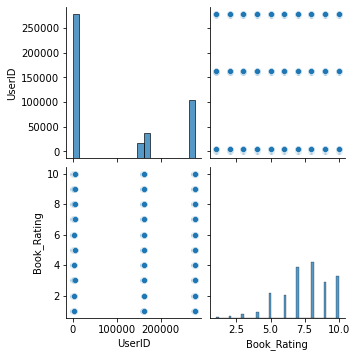

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(book)
plt.show()

In [20]:
book[book['UserID'].duplicated()]

,UserID,Book_Title,Book_Rating
2,276729,Decision in Normandy,6
8,276747,Under the Black Flag: The Romance and the Real...,9
9,276747,Where You'll Find Me: And Other Stories,8
10,276747,Nights Below Station Street,7
11,276747,Hitler's Secret Bankers: The Myth of Swiss Neu...,7
...,...,...,...
9994,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7


In [5]:
book_df = book.pivot_table(index = 'UserID', columns = 'Book_Title', values = 'Book_Rating')

KeyError: 'Book_Rating'

In [22]:
book_df.head()

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Count of null values
book_df.isna().sum()

Book_Title
 Jason, Madison &amp                                                       2181
 Other Stories;Merril;1985;McClelland &amp                                 2181
 Repairing PC Drives &amp                                                  2181
'48                                                                        2181
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      2181
                                                                           ... 
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    2181
\Well, there's your problem\: Cartoons                                     2181
iI Paradiso Degli Orchi                                                    2181
stardust                                                                   2181
Ã?Â?bermorgen.                                                             2181
Length: 9659, dtype: int64

In [24]:
# Input those NaNs with 0 values
book_df.fillna(0, inplace=True)

In [25]:
# Checking Null values
book_df.isna().sum()

Book_Title
 Jason, Madison &amp                                                       0
 Other Stories;Merril;1985;McClelland &amp                                 0
 Repairing PC Drives &amp                                                  0
'48                                                                        0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      0
                                                                          ..
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    0
\Well, there's your problem\: Cartoons                                     0
iI Paradiso Degli Orchi                                                    0
stardust                                                                   0
Ã?Â?bermorgen.                                                             0
Length: 9659, dtype: int64

# Calculate Cosine Similarity between Users

In [26]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [27]:
user_sim = 1 - pairwise_distances(book_df.values, metric = 'cosine')

In [28]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
# Store the result in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [30]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Set the index and column names to user ids
user_sim_df.index = book.UserID.unique()
user_sim_df.columns = book.UserID.unique()

In [32]:
user_sim_df.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [33]:
import numpy as np
np.fill_diagonal(user_sim, 0)  # fill diagonal(1) elements with 0 value
user_sim_df.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [34]:
# Most similar Users
user_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [43]:
#print(book[book['UserID']==276726])
#print(book[book['UserID']==276729])
#print(book[book['UserID']==276736])
#print(book[book['UserID']==276737])
#print(book[book['UserID']==276744])